    Accuracy (Точность): Это процент точных предсказаний вашей модели. В данном случае, точность составляет 0,98, что означает, что ваша модель правильно классифицировала 98% тестовых данных.

    Confusion Matrix (Матрица ошибок): Это матрица, которая показывает, сколько примеров было верно и ошибочно классифицировано каждым классом. В данной матрице есть четыре значения:

        True Positives (TP): Количество примеров, где ваша модель правильно предсказала положительный класс (в данном случае, "female").

        True Negatives (TN): Количество примеров, где ваша модель правильно предсказала отрицательный класс (в данном случае, "male").

        False Positives (FP): Количество примеров, где ваша модель неправильно предсказала положительный класс (ошибочно классифицированы как "female").

        False Negatives (FN): Количество примеров, где ваша модель неправильно предсказала отрицательный класс (ошибочно классифицированы как "male").

    В вашем случае у вас есть 291 TP, 330 TN, 6 FP и 7 FN.

    Classification Report (Отчет о классификации): Этот отчет предоставляет метрики оценки качества для каждого класса (в данном случае, "female" и "male") и их средние значения.

        Precision (Точность): Показывает, какая доля положительных предсказаний вашей модели действительно верна. Для "female" и "male" точность составляет 0,98, что означает, что около 98% предсказаний для каждого класса верны.

        Recall (Полнота): Показывает, какая доля истинных положительных примеров была правильно предсказана вашей моделью. Для "female" и "male" полнота составляет 0,98, что означает, что около 98% истинных примеров для каждого класса были найдены моделью.

        F1-Score (F1-мера): Это гармоническое среднее между точностью и полнотой. Она используется, когда важно балансировать точность и полноту. В данном случае, F1-мера для "female" и "male" составляет 0,98.

        Support (Поддержка): Это количество примеров в каждом классе.

    В целом, результаты отчета о классификации говорят о том, что ваша модель хорошо справляется с задачей классификации и имеет высокую точность и полноту для обоих классов.

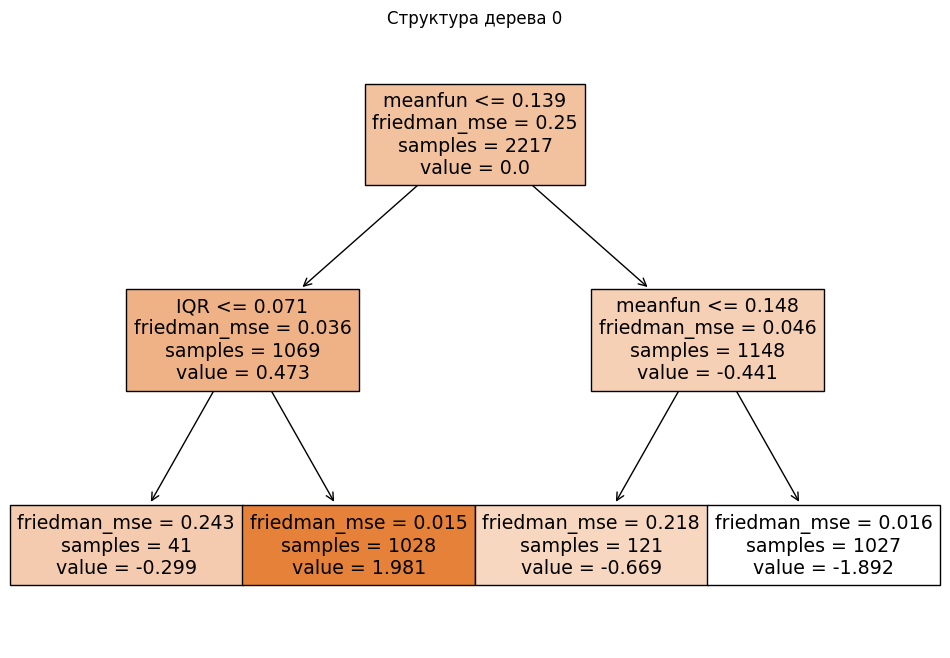

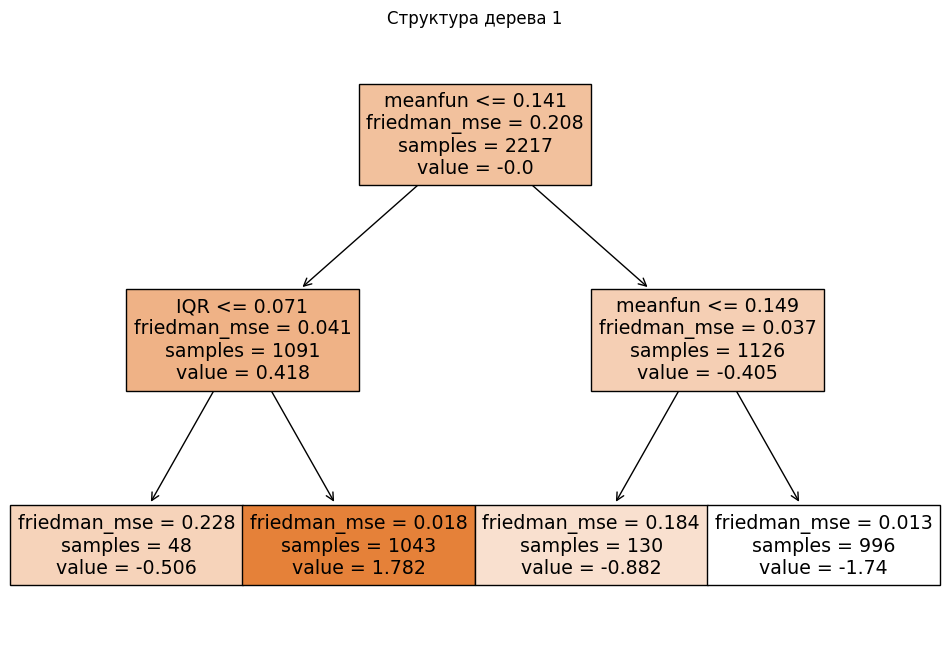

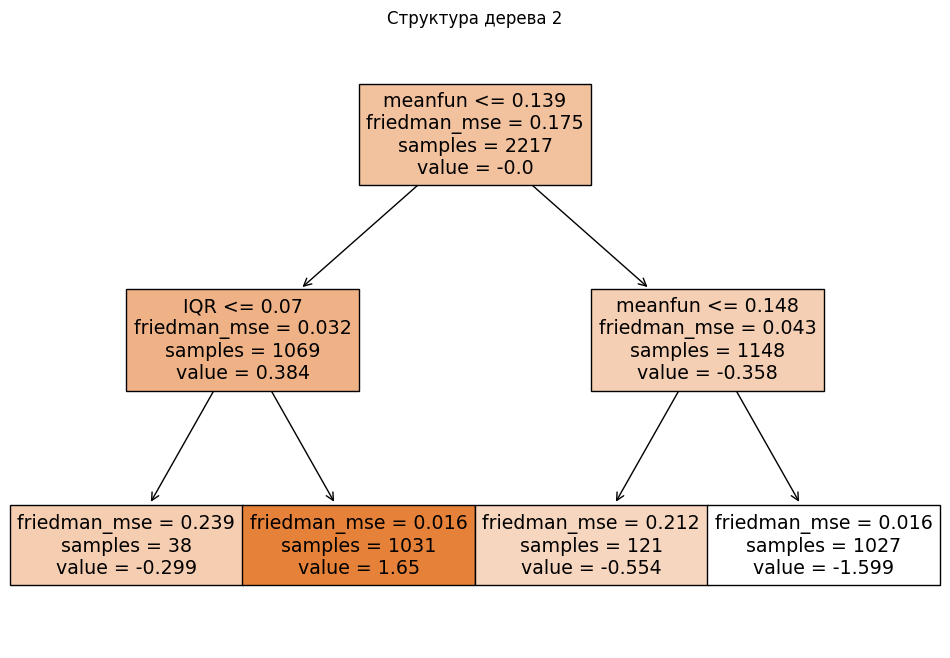

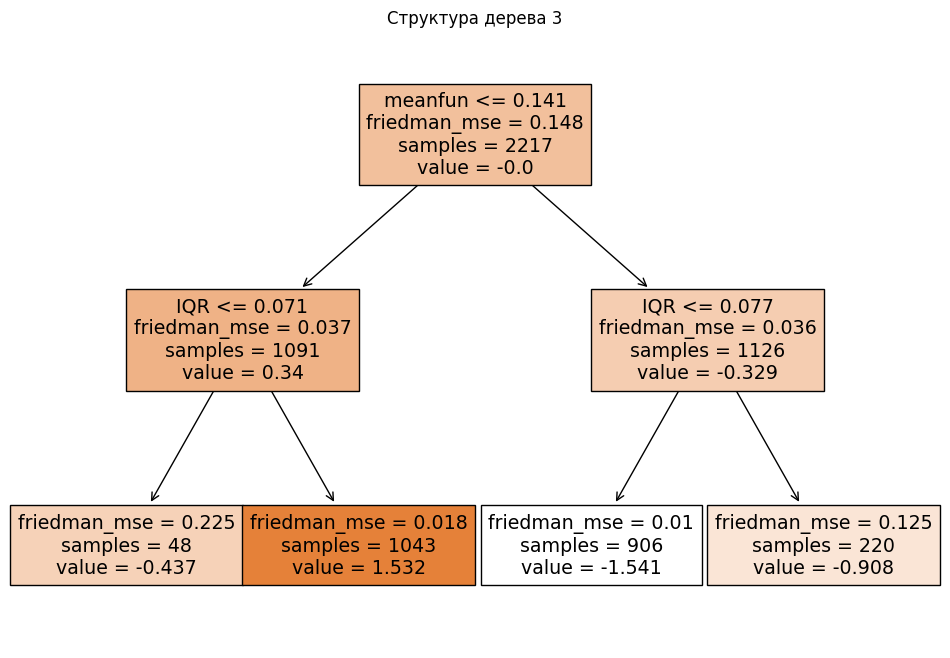

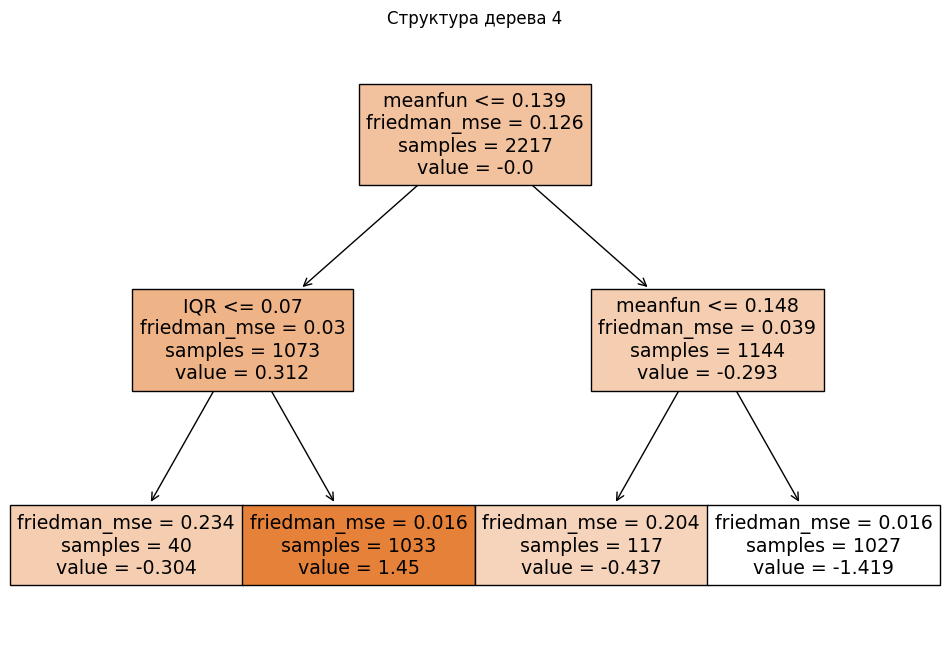

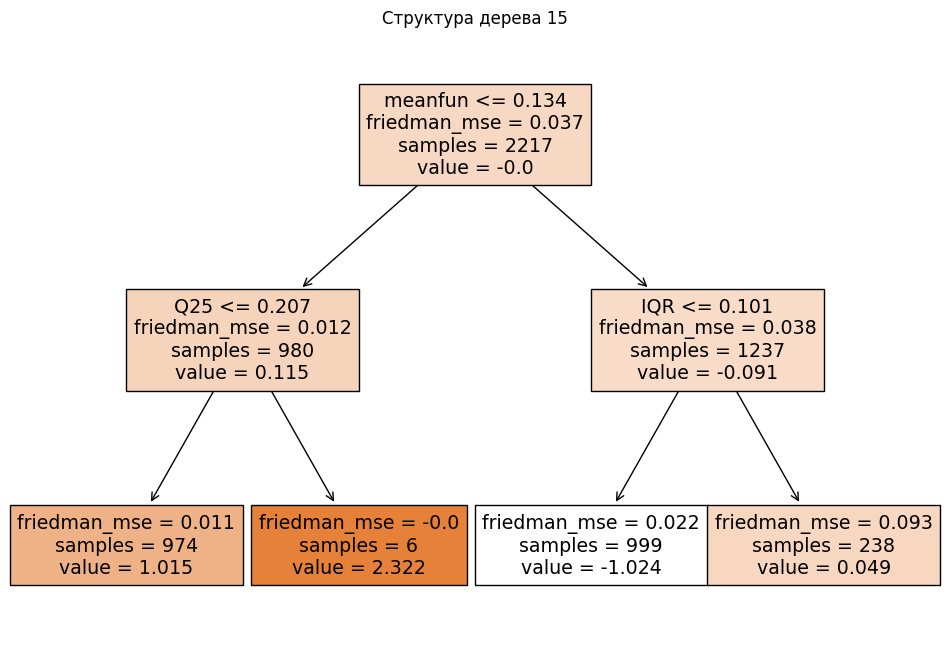

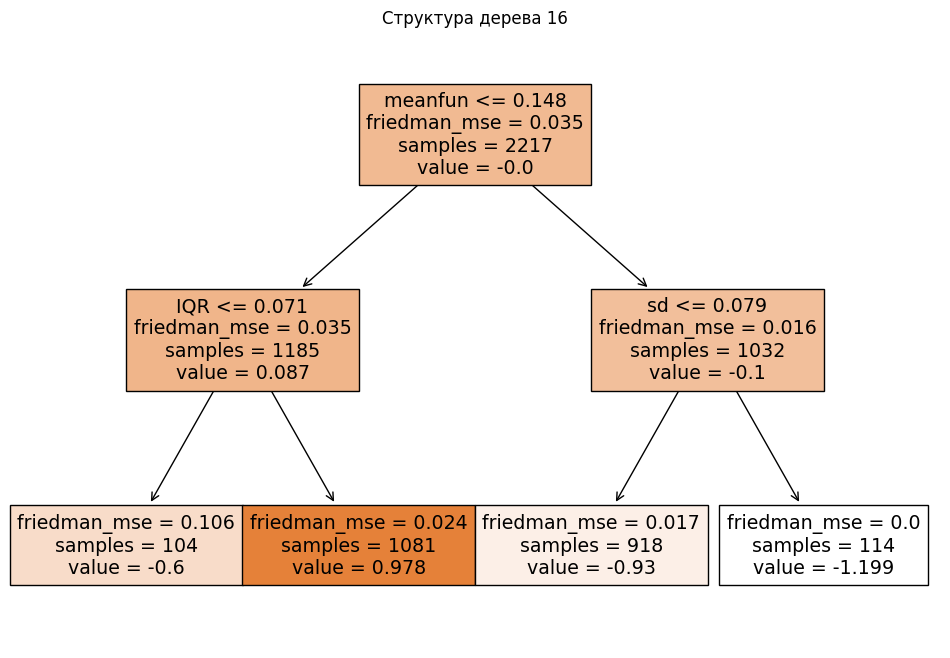

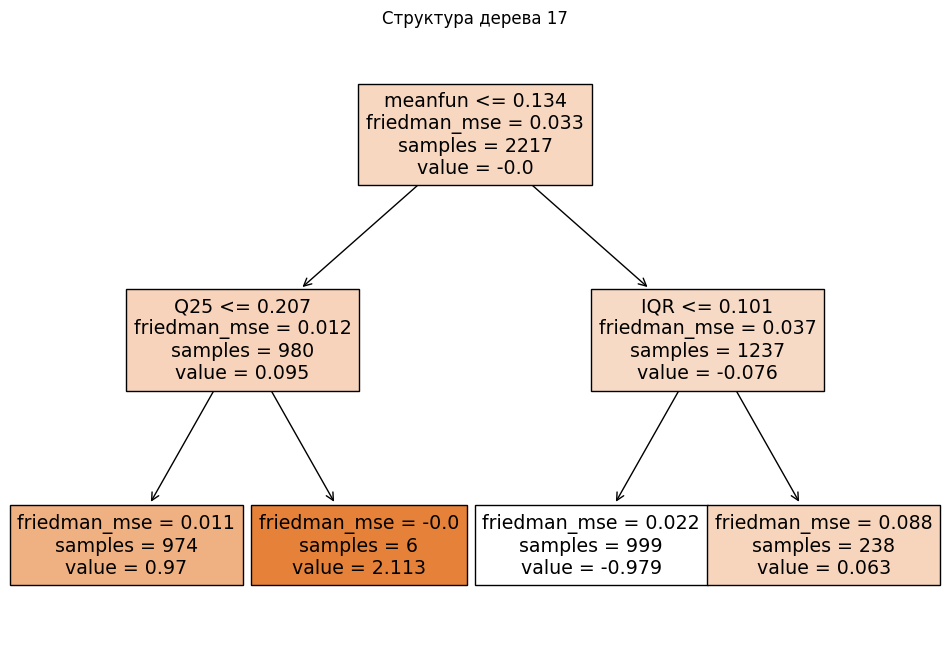

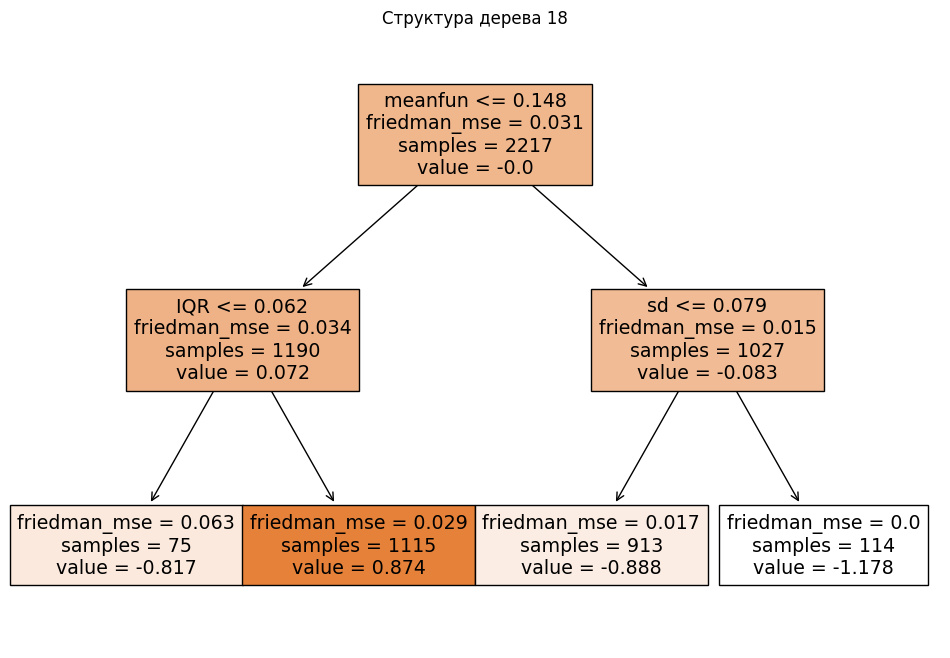

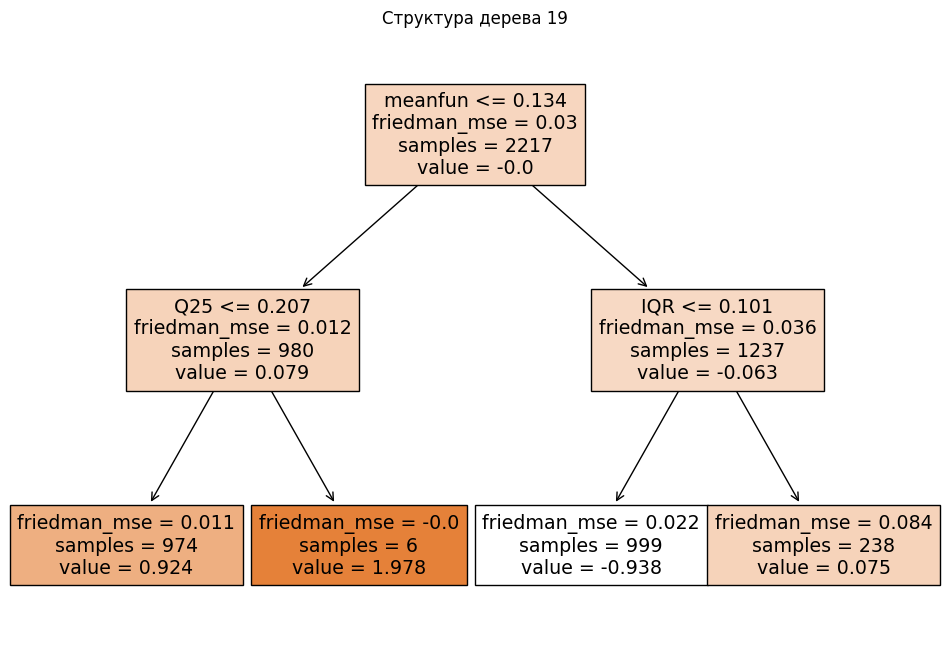

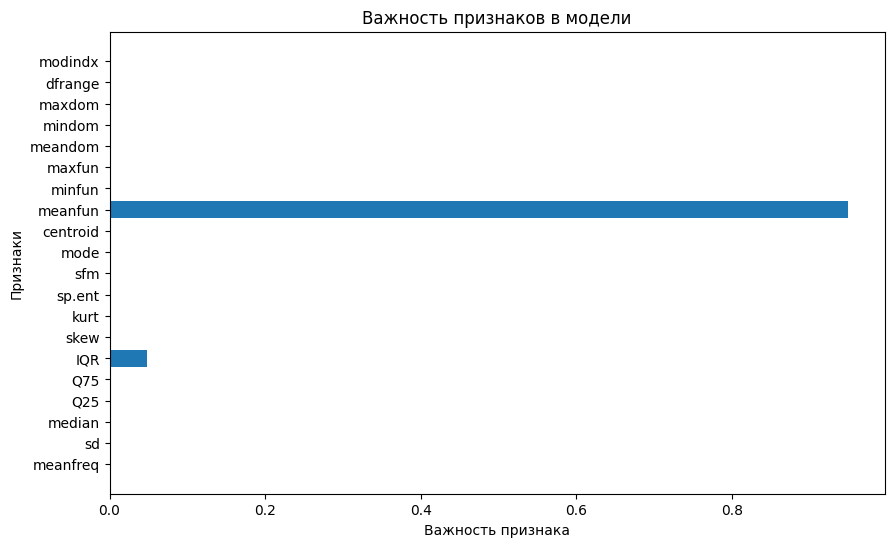

Accuracy: 0.97
Confusion Matrix:
 [[438  14]
 [ 19 480]]
Classification Report:
               precision    recall  f1-score   support

      female       0.96      0.97      0.96       452
        male       0.97      0.96      0.97       499

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



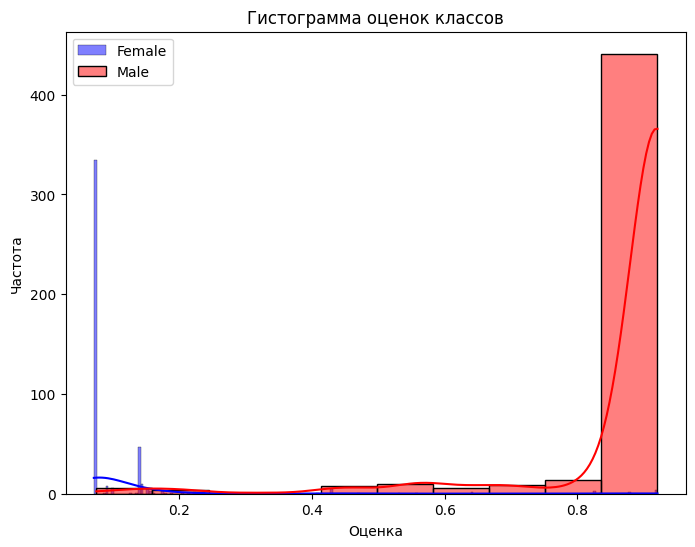

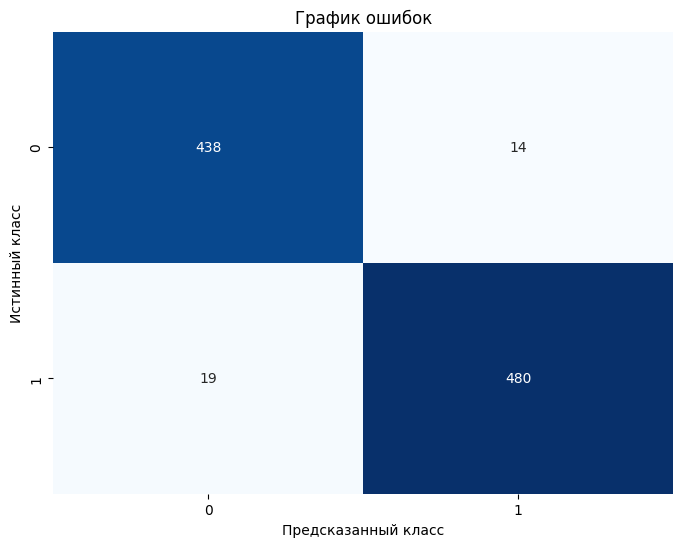

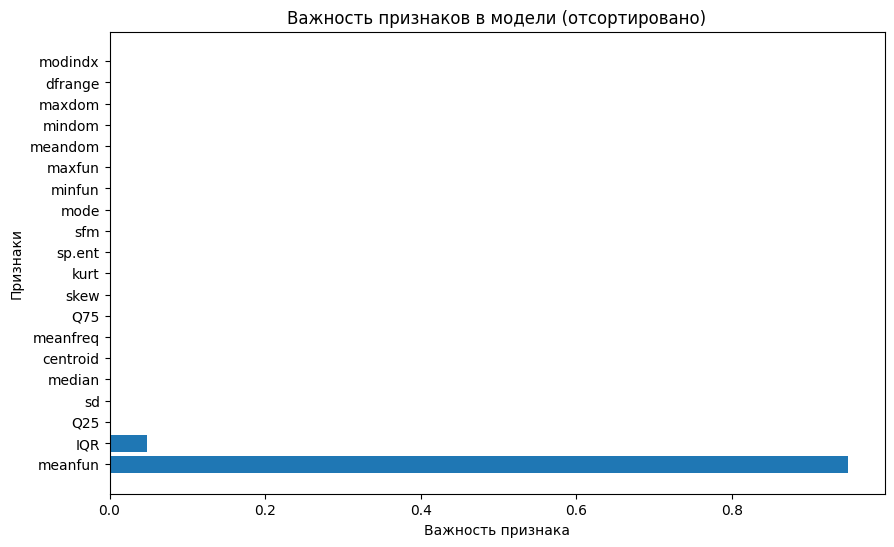

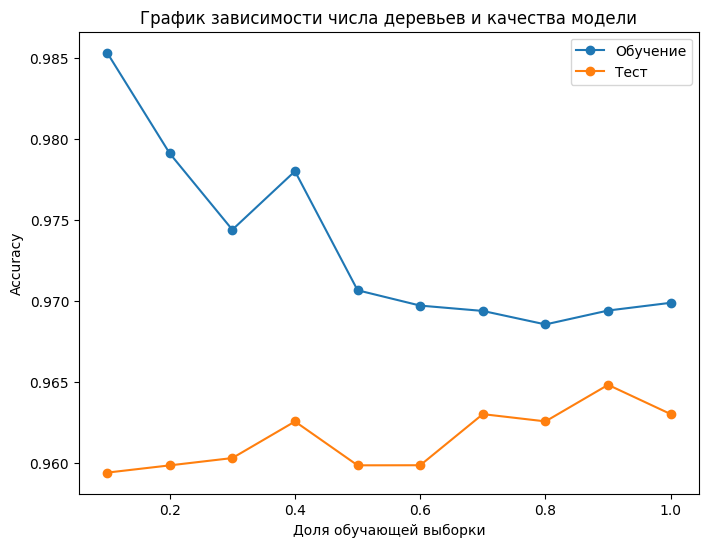

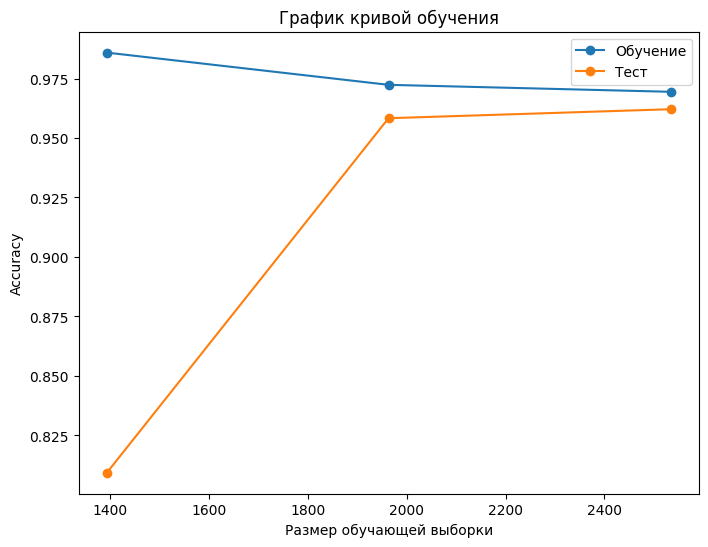

In [21]:
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
import seaborn as sns
from sklearn.tree import plot_tree

# Загрузка данных
data = pd.read_csv('voice.csv')

# Подготовка данных
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели градиентного бустинга
clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=2, random_state=42)
clf.fit(X_train, y_train)

feature_names = X.columns.tolist()

# # Визуализация структуры каждого дерева и сохранение в формате PNG
# for i, tree in enumerate(clf.estimators_):
#     plt.figure(figsize=(12, 8))
#     plot_tree(tree[0], filled=True, feature_names=feature_names, class_names=['male', 'female'])
#     plt.title(f'Структура дерева {i}')
#     plt.savefig(f'tree_{i}.png')

# Визуализация структуры первых 5 деревьев и сохранение в формате PNG
n_estimators = len(clf.estimators_)
first_5_trees = clf.estimators_[:5]

for i, tree in enumerate(first_5_trees):
    plt.figure(figsize=(12, 8))
    plot_tree(tree[0], filled=True, feature_names=feature_names, class_names=['male', 'female'])
    plt.title(f'Структура дерева {i}')
    plt.savefig(f'tree_{i}_first.png')

# Визуализация структуры последних 5 деревьев и сохранение в формате PNG
last_5_trees = clf.estimators_[-5:]

for i, tree in enumerate(last_5_trees):
    plt.figure(figsize=(12, 8))
    plot_tree(tree[0], filled=True, feature_names=feature_names, class_names=['male', 'female'])
    plt.title(f'Структура дерева {n_estimators - 5 + i}')
    plt.savefig(f'tree_{n_estimators - 5 + i}_last.png')

# Визуализация важности признаков
feature_importances = clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков в модели')
plt.show()

# Оценка модели
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)

# Вычислить оценки вероятности класса "female" с помощью метода predict_proba
y_probabilities = clf.predict_proba(X_test)
female_scores = y_probabilities[:, 1][y_test == 'female']
male_scores = y_probabilities[:, 1][y_test == 'male']

# Построить гистограммы
plt.figure(figsize=(8, 6))
sns.histplot(female_scores, kde=True, label='Female', color='blue')
sns.histplot(male_scores, kde=True, label='Male', color='red')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Гистограмма оценок классов')
plt.legend()
plt.show()

# График ошибок
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('График ошибок')
plt.show()

# График важности признаков
feature_importances_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
features_sorted, importances_sorted = zip(*feature_importances_sorted)
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importances_sorted)
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков в модели (отсортировано)')
plt.show()

# График зависимости числа деревьев и качества модели
train_sizes, train_scores, test_scores, *_ = learning_curve(clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0.1, 1.0, 10), train_scores_mean, marker='o', label='Обучение')
plt.plot(np.linspace(0.1, 1.0, 10), test_scores_mean, marker='o', label='Тест')
plt.xlabel('Доля обучающей выборки')
plt.ylabel('Accuracy')
plt.title('График зависимости числа деревьев и качества модели')
plt.legend()
plt.show()

# График кривой обучения
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, marker='o', label='Обучение')
plt.plot(train_sizes, test_scores_mean, marker='o', label='Тест')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Accuracy')
plt.title('График кривой обучения')
plt.legend()
plt.show()
